# Implementasi Sistem Pemadam Kebakaran Pada Ruang Tertutup Berbasis Arduino Menggunakan Logika Fuzzy

    NAMA  : FAHRUL RAVI
    NIM   : 09011281722053
    KELAS : SK5A
    MK    : KECERDASAN BUATAN
    Dosen : Prof.Dr.Ir. Siti Nurmaini,M.T.

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

   Fuzzy Logic Untuk Menentukan Tingkat bahaya dari masing masing output. Dalam program ini terdapat input dan ouput. Input yang di gunakan ada 3 yaitu suhu,asap,api. untuk ouput yang digunakan ada 2 yaitu kecepatan kipas dan durasi pompa.Numpy merupakan singkatan dari numerical python, adalah module yang di khususkan untuk menganalisa data dan memelakukan secara numerik disimbolkan dalam bentuk array(susunan).

# Fuzzifikasi

***ialah proses untuk mengubah nilai crisp yang diterima menjadi nilai fuzzy (memiliki nilai diantara 0 dan 1). Hal ini dapat dilakukan dengan memasukkan nilai crisp kedalam himpunan fuzzy yang memiliki beberapa kondisi dengan derajat keanggotaannya masing masing.***

## input
### ***-suhu***
    Dingin : 1 - 25
    Sedang : 10 - 40
    panas : 25 - 50
### ***-asap***
    Tipis : 1-50
    Sedang: 25-75
    Tebal: 50-100
### ***-api***
    Dekat: 1-300
    Agak Dekat: 100-600
    Agak Jauh: 400-900
    Jauh: 700-1000

## output
### ***-kipas***
    Lambat: 1-125
    Sedang: 65-200
    Cepat: 125-250
    
### ***-pompa***
    Singkat: 1-50
    Agak lama: 30-90
    Lama: 60-125

In [2]:
suhu = ctrl.Antecedent(np.arange(1,51,1), 'suhu')
asap = ctrl.Antecedent(np.arange(1,101,1), 'asap')
api = ctrl.Antecedent(np.arange(1,1001,1), 'api')
kipas= ctrl.Consequent(np.arange(1,251,1),'kipas')
pompa= ctrl.Consequent(np.arange(1,126,1),'pompa')

Variabel input suhu memiliki rentang nilai dari 0 sampai 50 Variabel input asap memiliki rentang nilai dari 0 sampai 100 Variabel input api badan memiliki rentang nilai dari 0 sampai 1000 Variabel output kecepatan kipas & pompa mempunyai nilai rata-rata, dimana nilai tersebut dapat beraksi Jika terdeteksi kebakaran maka alarm peringatan berbunyi, jika terdeteksi api dan suhu meningkat diatas ambang batas maka kompresor air menyala untuk memadamkan api, jika semakin banyak asap maka exhaust fan aktif. Proses pengambilan keputusan tersebut menggunakan algoritma fuzzy untuk lebih akurat dalam pengaplikasiannya.

# INPUT

### SUHU

Suhu Dingin = 1 - 25

In [3]:
suhu['dingin'] = fuzz.trapmf(suhu.universe, [1 ,1 , 10, 25])
suhu['sedang'] = fuzz.trimf(suhu.universe, [10, 25, 40])
suhu['panas'] = fuzz.trapmf(suhu.universe, [25, 40, 50, 50])

Untuk data "suhu" memiliki 3 fungsi keanggotaan yaitu dingin, sedang dan panas. 

Fungsi Keanggotaan Suhu

$$
\mu SuhuDingin[x] = 
\begin{cases}
1 & ;1 \leq x \leq 10\\
(25-x)/(25-10) &; 10<x<25 \\ 
0 & ; x \geq 25 \\
\end{cases}
$$

.
.
$$
\mu Suhusedang[x] = 
\begin{cases}
0 & ;\text{$x \leq 10$ atau $x \geq 40$}\\
(x-10)/(25-10) &; 10<x<25 \\ 
(40-x)/(40-25) & ; 25 \leq x < 40 \\
\end{cases}
$$

$$
\mu Suhupanas[x] = 
\begin{cases}
0 & ;x \leq 25   \\
(x-25)/(40-25) &; 25<x<40 \\ 
1 & ;x \geq 40 \\
\end{cases}
$$

C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


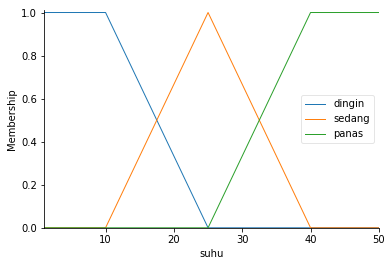

In [4]:
suhu.view()

Menampilkan Membership Function untuk input variabel "suhu"

### ASAP

In [5]:
asap['tipis'] = fuzz.trapmf(asap.universe, [1 ,1 , 25, 50])
asap['sedang'] = fuzz.trimf(asap.universe, [25, 50, 75])
asap['tebal'] = fuzz.trapmf(asap.universe, [50, 75, 100, 100])

Untuk data "asap" memiliki 3 fungsi keanggotaan yaitu tipis, sedang dan tebal. 

$
\mu AsapTipis[x] = 
\begin{cases}
1 & ;1 \leq x \leq 25   \\
(50-x)/(50-25) &; 25<x<50 \\ 
0 & ;x \geq 50 \\
\end{cases}
$

$
\mu AsapSedang[x] = 
\begin{cases}
0 & ;x \leq 25 \text{ atau } x \leq 75 \\
(x-25)/(50-25) &; 25<x<50 \\ 
(75-x)/(75-50) & ;50<x \leq 75 \\
\end{cases}
$

$
\mu AsapTebal[x] = 
\begin{cases}
0 & ;x \leq 50   \\
(x-50)/(75-50) &; 50<x<75 \\ 
1 & ;x \geq 75 \\
\end{cases}
$

C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


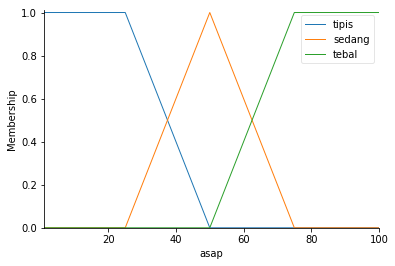

In [6]:
asap.view()

Menampilkan Membership Function untuk input variabel "asap"

### API

In [7]:
api['dekat'] = fuzz.trapmf(api.universe, [1 ,1 , 100, 300])
api['agak dekat'] = fuzz.trapmf(api.universe, [100, 300, 400, 600])
api['agak jauh'] = fuzz.trapmf(api.universe, [400, 600, 700, 900])
api['jauh'] = fuzz.trapmf(api.universe, [700, 900, 1000, 1000])

Untuk data "api" memiliki 4 tanda yaitu dekat, agak dekat, agak jauh dan jauh. 

$
\mu ApiDekat[x] = 
\begin{cases}
1 & ;1 \leq x \leq 100   \\
(300-x)/(300-100) &; 100<x<300 \\ 
0 & ;x \geq 300 \\
\end{cases}
$

$
\mu ApiAgakDekat[x] = 
\begin{cases}
(x-100)/(300-100) & ;100 < x < 300   \\
1 &; 300 \leq x \leq 400 \\ 
(600-x)/(600-400) & ;400< x < 600 \\
0 & ; x\leq 100   \text{ atau }  x \geq 600\\
\end{cases}
$

$
\mu ApiJauh[x] = 
\begin{cases}
(x-400)/(600-400) & ;400 < x < 600   \\
1 &; 600 \leq x \leq 800 \\ 
(900-x)/(900-700) & ;700 < x < 900 \\
0 &; x \leq 900 \text{  atau  } x \geq 900 \\
\end{cases}
$

$
\mu Jauh[x] = 
\begin{cases}
0 & ;x \leq  700   \\
(x-700)/(900-700) &; 700< x < 900 \\ 
1 & ;x \geq 900 \\
\end{cases}
$

C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


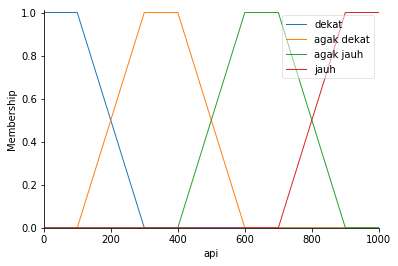

In [8]:
api.view()

Menampilkan Membership Function untuk input variabel "api"

# OUTPUT

### KIPAS

In [9]:
kipas['lambat'] = fuzz.trimf(kipas.universe, [1 ,50 , 125])
kipas['sedang'] = fuzz.trimf(kipas.universe, [65, 125, 200])
kipas['cepat'] = fuzz.trimf(kipas.universe, [125, 200, 250])

untuk data output reaksi kipas berdasarkan 3 kategori yaitu lambat,sedang,dan cepat

$
\mu KipasLambat[x] = 
\begin{cases}
0 & ;x \leq 1 \text{ atau } x \leq 125 \\
(x-1)/(50-1) &; 1<x<50 \\ 
(125-x)/(125-50) & ; 50<x \leq 125 \\
\end{cases}
$

$
\mu KipasSedang[x] = 
\begin{cases}
0 & ;x \leq 65 \text{ atau } x \leq 200 \\
(x-65)/(125-1) &; 65<x<125 \\ 
(200-x)/(200-125) & ; 125<x \leq 200 \\
\end{cases}
$

$
\mu KipasSedang[x] = 
\begin{cases}
0 & ;x \leq 125 \text{ atau } x \leq 250 \\
(x-125)/(200-125) &; 125<x<200 \\ 
(250-x)/(250-200) & ; 200<x \leq 250 \\
\end{cases}
$

C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


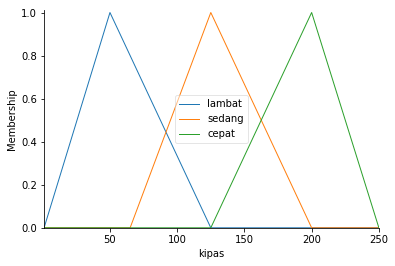

In [10]:
kipas.view()

Menampilkan Membership Function untuk variabel output reaksi kipas

# POMPA

In [11]:
pompa['singkat']= fuzz.trimf(pompa.universe, [1 ,30 , 50])
pompa['agak lama'] = fuzz.trimf(pompa.universe, [30, 60, 90])
pompa['lama'] = fuzz.trimf(pompa.universe, [60, 90, 125])

untuk data output reaksi pompa berdasarkan 3 kategori yaitu singkat,agak lama,dan lama

$
\mu PompaSigkat[x] = 
\begin{cases}
0 & ;x \leq 1 \text{ atau } x \leq 50 \\
(x-1)/(30-1) &; 1<x<30 \\ 
(50-x)/(50-30) & ; 30<x \leq 50 \\
\end{cases}
$

$
\mu PompaAgakLama[x] = 
\begin{cases}
0 & ;x \leq 30 \text{ atau } x \leq 90 \\
(x-30)/(60-30) &; 30<x<60 \\ 
(90-x)/(90-30) & ; 60<x \leq 90 \\
\end{cases}
$

$
\mu PompaAgakLama[x] = 
\begin{cases}
0 & ;x \leq 60 \text{ atau } x \leq 125 \\
(x-60)/(90-60) &; 60<x<90 \\ 
(125-x)/(125-60) & ; 90<x \leq 125 \\
\end{cases}
$

C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


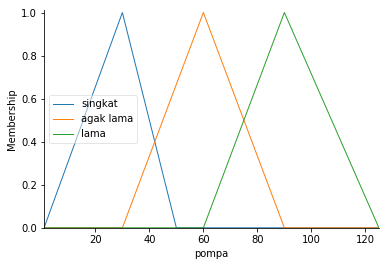

In [12]:
pompa.view()

Menampilkan Membership Function untuk variabel output reaksi pompa

# Rule Based

In [13]:
rule1 = ctrl.Rule(suhu['dingin'] & asap['tipis']& api['dekat'],(kipas['lambat'],pompa['singkat']))
rule2 = ctrl.Rule(suhu['dingin'] & asap['tipis']& api['agak dekat'],(kipas['lambat'],pompa['singkat']))
rule3 = ctrl.Rule(suhu['dingin'] & asap['tipis']& api['agak jauh'],(kipas['sedang'],pompa['agak lama']))
rule4 = ctrl.Rule(suhu['dingin'] & asap['tipis']& api['jauh'],(kipas['sedang'],pompa['agak lama']))
rule5 = ctrl.Rule(suhu['dingin'] & asap['sedang']& api['dekat'],(kipas['cepat'],pompa['lama']))
rule6 = ctrl.Rule(suhu['dingin'] & asap['sedang']& api['agak dekat'],(kipas['cepat'],pompa['lama']))
rule7 = ctrl.Rule(suhu['dingin'] & asap['sedang']& api['agak jauh'],(kipas['lambat'],pompa['singkat']))
rule8 = ctrl.Rule(suhu['dingin'] & asap['sedang']& api['jauh'],(kipas['lambat'],pompa['singkat']))
rule9 = ctrl.Rule(suhu['dingin'] & asap['tebal']& api['dekat'],(kipas['cepat'],pompa['lama']))
rule10 = ctrl.Rule(suhu['dingin'] & asap['tebal']& api['agak dekat'],(kipas['cepat'],pompa['lama']))
rule11 = ctrl.Rule(suhu['dingin'] & asap['tebal']& api['agak jauh'],(kipas['lambat'],pompa['singkat']))
rule12 = ctrl.Rule(suhu['dingin'] & asap['tebal']& api['jauh'],(kipas['lambat'],pompa['singkat']))
rule13 = ctrl.Rule(suhu['sedang'] & asap['tipis']& api['dekat'],(kipas['sedang'],pompa['agak lama']))
rule14 = ctrl.Rule(suhu['sedang'] & asap['tipis']& api['agak dekat'],(kipas['sedang'],pompa['agak lama']))
rule15 = ctrl.Rule(suhu['sedang'] & asap['tipis']& api['agak jauh'],(kipas['lambat'],pompa['singkat']))
rule16 = ctrl.Rule(suhu['sedang'] & asap['tipis']& api['jauh'],(kipas['lambat'],pompa['singkat']))
rule17 = ctrl.Rule(suhu['sedang'] & asap['sedang']& api['dekat'],(kipas['cepat'],pompa['lama']))
rule18 = ctrl.Rule(suhu['sedang'] & asap['sedang']& api['agak dekat'],(kipas['cepat'],pompa['lama']))
rule19 = ctrl.Rule(suhu['sedang'] & asap['sedang']& api['agak jauh'],(kipas['sedang'],pompa['agak lama']))
rule20 = ctrl.Rule(suhu['sedang'] & asap['sedang']& api['jauh'],(kipas['sedang'],pompa['agak lama']))
rule21 = ctrl.Rule(suhu['sedang'] & asap['tebal']& api['dekat'],(kipas['cepat'],pompa['lama']))
rule22 = ctrl.Rule(suhu['sedang'] & asap['tebal']& api['agak dekat'],(kipas['cepat'],pompa['lama']))
rule23 = ctrl.Rule(suhu['sedang'] & asap['tebal']& api['agak jauh'],(kipas['lambat'],pompa['singkat']))
rule24 = ctrl.Rule(suhu['sedang'] & asap['tebal']& api['jauh'],(kipas['lambat'],pompa['singkat']))
rule25 = ctrl.Rule(suhu['panas'] & asap['tipis']& api['dekat'],(kipas['sedang'],pompa['agak lama']))
rule26 = ctrl.Rule(suhu['panas'] & asap['tipis']& api['agak dekat'],(kipas['sedang'],pompa['agak lama']))
rule27 = ctrl.Rule(suhu['panas'] & asap['tipis']& api['agak jauh'],(kipas['lambat'],pompa['singkat']))
rule28 = ctrl.Rule(suhu['panas'] & asap['tipis']& api['jauh'],(kipas['lambat'],pompa['singkat']))
rule29 = ctrl.Rule(suhu['panas'] & asap['sedang']& api['dekat'],(kipas['cepat'],pompa['lama']))
rule30 = ctrl.Rule(suhu['panas'] & asap['sedang']& api['agak dekat'],(kipas['cepat'],pompa['lama']))
rule31 = ctrl.Rule(suhu['panas'] & asap['sedang']& api['agak jauh'],(kipas['sedang'],pompa['agak lama']))
rule32 = ctrl.Rule(suhu['panas'] & asap['sedang']& api['jauh'],(kipas['sedang'],pompa['agak lama']))
rule33 = ctrl.Rule(suhu['panas'] & asap['tebal']& api['dekat'],(kipas['cepat'],pompa['lama']))
rule34 = ctrl.Rule(suhu['panas'] & asap['tebal']& api['agak dekat'],(kipas['cepat'],pompa['lama']))
rule35 = ctrl.Rule(suhu['panas'] & asap['tebal']& api['agak jauh'],(kipas['sedang'],pompa['agak lama']))
rule36 = ctrl.Rule(suhu['panas'] & asap['tebal']& api['jauh'],(kipas['lambat'],pompa['agak lama']))

## Rules

Proses ini dilakukan setelah diperoleh nilai masing-masing derajat keanggotaan tiap parameter dan untuk mencari nilai minimum tiap rule (aturan). terbentuk 10 himpunan fuzzy sebagai input, yaitu: dingin, sedang, panas, tipis, sedang, tebal dan dekat, agak dekat, jauh, tidak ada api. Ditambah dengan 8 himpunan kondisi sebagai output, yaitu : lambat, sedang, cepat dan off, singkat , agak lama, lama. Fuzzy sistem yang akan dibuat dengan menggunakan perintah “IF” dan “AND” dan menghasikan perintah “THEN”,sehingga didapatkan 36 rule.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a244bbf160>)

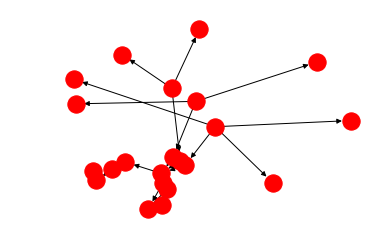

In [14]:
rule1.view()

In [15]:
kendali_kebakaran= ctrl.ControlSystem([rule1, rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10
                                       ,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20
                                       ,rule21,rule22,rule23,rule24,rule25,rule26,rule27,rule28,rule29,rule30
                                       ,rule31,rule32,rule33,rule34,rule35,rule36])

In [16]:
kebakaran= ctrl.ControlSystemSimulation(kendali_kebakaran)

In [17]:
kebakaran.input['suhu']= 10
kebakaran.input['asap']= 25
kebakaran.input['api']= 400

# Defuzzifikasi

In [18]:
kebakaran.compute()
kebakaran.output

OrderedDict([('kipas', 58.66666666666664), ('pompa', 27.000000000000004)])

## Penjelasan Code
1. **compute()** 
        Fungsi ini menghitung nilai defuzzifikasi sesuai dengan nilai aggregat yang sudah dihitung pada ControlSystem.
2. **output**
        Fungsi ini menampilkan nilai defuzzifikasi yang sudah dihitung dengan "compute()".

C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


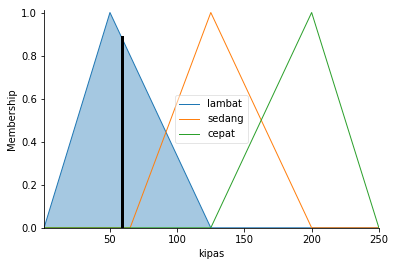

In [19]:
kipas.view(sim=kebakaran)

C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


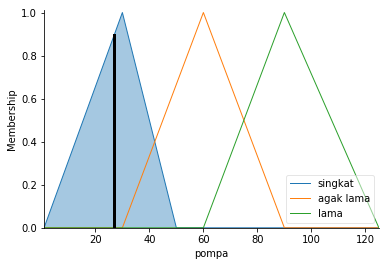

In [20]:
pompa.view(sim=kebakaran)

# Penghitungan Manual

## Input

- suhu : 10
- asap : 25
- api  : 400


### suhu
- dingin

$$
\mu SuhuDingin[10] = 
\begin{cases}
\bf 1 & ;1 \leq x \leq 10 \checkmark \\ 
(25-x)/(25-10) &; 10<x<25 \\ 
0 & ; x \geq 25 \\
\end{cases}
$$

### asap
- Tipis

$$
\mu AsapTipis[25] = 
\begin{cases}
\bf 1 & ;1 \leq x \leq 25 \checkmark  \\
(50-x)/(50-25) &; 25<x<50 \\ 
0 & ;x \geq 50 \\
\end{cases}
$$

### api
- Agak Dekat

$$
\mu ApiAgakDekat[400] = 
\begin{cases}
(x-100)/(300-100) & ;100 < x < 300   \\
\bf 1 &; 300 \leq x \leq 400 \checkmark \\ 
(600-x)/(600-400) & ;400< x < 600 \\
0 & ; x\leq 100   \text{ atau }  x \geq 600\\
\end{cases}
$$

\begin{equation}
    \mu SuhuDingin(10) = 1 \\
    \mu AsapTipis(25) = 1 \\
    \mu ApiAgakDekat(400) = 1 \\
\end{equation}

## Implikasi Rule

Rule 2 : IF Suhu Dingin AND Asap tipis AND Api Agak Dekat THEN Kipas Lambat dan Pompa SIngkat

Mencari Nilai Rule 

    Rule 2 = IF Suhu "Dingin" AND Asap "tipis" AND Api "Agak Dekat" THEN Kipas "Lambat" dan Pompa "SIngkat"
           = SuhuDingin[1] dan AsapTipis[1] dan ApiAgakDekat[1] 
           = 1

Akan diambil nilai terkecil/MIN

Maka nilai yang ada di Rule 2 = Kipas Lambat[1] dan Pompa Singkat[1]

======================================================================================================

## Penghitungan manual pada Kipas
    X merupakan nilai yang ada pada output Kipas yang sudah di pecah menjadi 2 bagian
    X1 :
    a = 1 dan b = 50
    X2 : 
    a = 50 b = 125

### Perhitungan Xi
## X1
$$
X1 = a+\frac{2}{3}(b-a)\\
X1 = 1+\frac{2}{3}(50-1)\\
X1 = 1+32,66\\
\bf X1 = 33,66\\
$$

## X2
$$
X2 = a+\frac{1}{3}(b-a)\\
X2 = 50+\frac{1}{3}(125-50)\\
X2 = 50+ 25\\
\bf X2 = 75\\
$$

### Mencari nilai Luas daerah     
    Kemudian mencari nilai Luas pada masing-masing daerah
    A = nilai daerah 
    A1 : Alas    : 49
         Tinggi  : 1
    A2 : Alas    : 75
         Tinggi  : 1

## A1
$$
A1 = \frac{1}{2}(a*t)\\
A1 = \frac{1}{2}(49*1)\\
A1 = 24,5\\
$$

## A2
$$
A2 = \frac{1}{2}(a*t)\\
A2 = \frac{1}{2}(75+1)\\
A2 = 37,5\\
$$

### Hasil Defuzzifikasi Kipas
$$
HasilDefuzzifikasi = \frac{(X1A1) + (X2A2)}{A1+A2}\\
HasilDefuzzifikasi = \frac{(33,66*24,5) + (75*37,5)}{24,5+37,5}\\
HasilDefuzzifikasi =  \frac { (824,67)+(2812,5}{62}\\
\bf HasilDefuzzifikasi = 58.66
$$

## Perhitungan manual Pompa    
    Penghitungan manual pada Pompa
    X merupakan nilai yang ada pada output Pompa yang sudah di pecah menjadi 2 bagian
    X1 : a:1 b:25
    X2 : a:25 b:50

### Perhitungan Xi
## X1
$$
X1 = a+\frac{2}{3}(b-a)\\
X1 = 1+\frac{2}{3}(25-1)\\
X1 = 1+ \frac{2}{3} (24)\\
\bf X1 = 13\\
$$

## X2
$$
X1 = a+\frac{1}{3}(b-a)\\
X2 = 25 + \frac{1}{3}(50-25)\\
X2 = 25+ \frac{1}{3} (25)\\
\bf X2 = 33,33\\
$$

### Perhitungan Luas Daerah     
    Kemudian mencari nilai Luas pada masing-masing daerah
    A = nilai daerah 
    A1 : Alas    : 24
         Tinggi  : 1
    A2 : Alas    : 30
         Tinggi  : 1
### A1
$$
A1 = \frac{1}{2}(a*t)\\
A1 = \frac{1}{2}(24*1)\\
A1 = \frac{1}{2}(24)\\
\bf A1 = 12\\
$$

### A2
$$
A2 = \frac{1}{2}(a*t)\\
        A2 = \frac{1}{2}(30*1)\\
        A2 = \frac{1}{2}(30)\\
        \bf A2 = 15\\
$$

### Hasil Defuzzyfikasi Pompa
$$
HasilDefuzzifikasi = \frac{(X1A1) + (X2A2)}{A1+A2}\\
HasilDefuzzifikasi = \frac{(13*12) + (33,33*15)}{12+15}\\
HasilDefuzzifikasi =  \frac { (156)+(499.95)}{27}\\
\bf HasilDefuzzifikasi = 24.29
$$

# Referensi

 ### Implementasi Sistem Pemadam Kebakaran Pada Ruang Tertutup Berbasis Arduino Menggunakan Logika Fuzzy  
Rahmat Naharu Yanuar1, Mochammad Hannats Hanafi Ichsan2, Gembong Edhi Setyawan3 Program Studi Teknik Informatika, Fakultas Ilmu Komputer, Universitas Brawijaya Email: 1rnyanuar19@gmail.com, 2hanas.hanafi@ub.ac.id, 3gembong@ub.ac.id 